In [ ]:
# In colab run this cell first to setup the file structure!
%cd /content
!rm -rf MOL518-Intro-to-Data-Analysis

!git clone https://github.com/shaevitz/MOL518-Intro-to-Data-Analysis.git
%cd MOL518-Intro-to-Data-Analysis/Lecture_3

# Lecture 3: Plotting Data

In Lecture 2 you made your first plot. In this lecture we will make plots that are easier to read, easier to compare, and useful for talks and papers

The goals of this lecture are to:

- Plot multiple kinds of one dimensional data, including time series, histograms, and categorical summaries.
- Manipulate key components of a scientific figure, including data, axes, labels, and legends.
- Overlay multiple datasets on the same plot
- Choose axis limits and scales
- Export figures in appropriate formats and resolutions for talks and papers.

We will use NumPy for arrays and matplotlib for plotting so will import them at the beginning of our notebook. For commonly used packages like this, it is useful just to import them as a matter of habit when you start out.


In [10]:
import numpy as np
import matplotlib.pyplot as plt

## What makes a plot good or bad?

A plot can be technically correct and still fail to communicate.

Common problems include:
- Missing axis labels or missing units.
- Legends that do not help you map visual elements to meaning.
- Default axis limits that clip features or hide structure.
- Styling choices that make the data hard to see.

[Edward Tufte](https://www.edwardtufte.com/books/) writes a lot about these issues in *The Visual Display of Quantitative Information*. The main point for us is simple. A plot is a visual argument. It should make it easy for a reader to see and understand the data in an unbiased and helpful way.


### Example of a bad plot

<div style="text-align: center;">
  <img src="media/bad_plot.jpg" width="600">
</div>

**Your turn:** Look at the plot above. What makes it hare to read and interpret?

## Line plots in 1D

A time series is a sequence of measurements indexed by time. Here we will use a growth curve, optical density (OD) versus time, which we say in the last class.

We will start with the simplest plot. Then we will refine it by adding labels, choosing a plot type, and adjusting style.

### Load the growth curve data

We will use the file `data/ecoli_drugs.csv`, which has *E. coli* growth curve data in the presence of antibiotics from the Gitai Lab . Open this file up in the file browser (to the left). It should be in the Lecture 3 folder.

You should see that there are 13 columns with the first row as a header to tell you what is in each column. Time is the first column (in minutes, hence the name `Time_min`) and the columns 2-13 show OD in the presence of the different drugs.

Our first task is to read in the file and extract the different data sets into individual arrays. For now we will put the drug names in from the header by hand. We will learn to do this programatically in a few lectures.

In [11]:
# Load the data, skipping the header row
data = np.loadtxt('data/ecoli_drugs.csv', delimiter=',', skiprows=1)

time_min = data[:, 0] #T ime in minutes is the first column

Rifampicin = data[:, 1] # OD for Rifamipicin is the second column
Novabiocin = data[:, 2] # OD for Novabiocin is the third column ...
Trimethoprim = data[:, 3]
Chloramphenicol = data[:, 4]
Ampicillin = data[:, 5]
Gentamycin = data[:, 6]
Gentamycin2 = data[:, 7]
Ampicillin2 = data[:, 8]
Chloramphenicol2 = data[:, 9]
Trimethoprim2 = data[:, 10]
Novabiocin2 = data[:, 11]
Rifampicin2 = data[:, 12]

### We'll start by plotting one of the growth curves

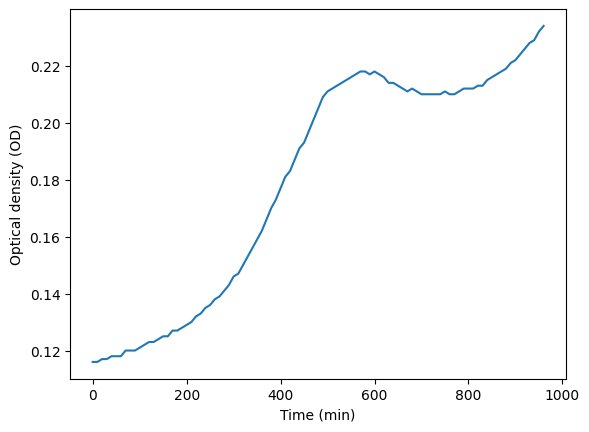

In [47]:
plt.plot(time_min, Novabiocin)
plt.xlabel('Time (min)')
plt.ylabel('Optical density (OD)')

# Note that in Jupyter notebooks this line is not strictly necessary. 
# In other Python contexts you need it.
plt.show()

### Basic styling

Matplotlib defaults are fine for quick checks, but for slides and papers you often want to control a few parameters.

#### Key parameters

- `linewidth` (or `lw`) controls line thickness. Try values like 1, 2, or 3 for most plots.
- `alpha` controls transparency (opacity). Values range from 0 (invisible) to 1 (fully opaque). Try 0.5 or 0.7 for semi-transparent overlays.
- `color` (or `c`) controls line or marker color.
- `s` controls marker size for scatter plots (we'll do these later). Try values like 20, 50, or 100.
- `marker` controls marker shape (for scatter plots or line plots with markers).

#### Common colors

You can specify colors by name (e.g., `color='red'`) or by shorthand (e.g., `color='r'`):
- Named colors: `'red'`, `'blue'`, `'green'`, `'black'`, `'gray'`, `'orange'`, `'purple'`, `'brown'`
- Shorthand: `'r'` (red), `'b'` (blue), `'g'` (green), `'k'` (black), `'c'` (cyan), `'m'` (magenta), `'y'` (yellow)

#### Common marker shapes

For scatter plots or line plots with markers:
- `'o'` = circle
- `'s'` = square
- `'^'` = triangle
- `'D'` = diamond
- `'*'` = star
- `'+'` = plus
- `'x'` = X mark
- `'.'` = point

#### Fonts and font sizes for axis labels

You can control font properties for axis labels, titles, and other text.

**Font size parameters:**
- `fontsize` (or `size`) controls the size of text in points (pt). Common values:
  - `10` or `12`: Default sizes, good for papers
  - `14` or `16`: Larger, better for presentations
  - `18` or `20`: Large, good for slides where people sit far away

**Font weight:**
- `fontweight` controls boldness: `'normal'`, `'bold'`, `'light'`, or numeric values 100-900
- Example: `fontweight='bold'` makes text stand out

**Font family:**
- `fontfamily` or `family` controls the typeface: `'serif'`, `'sans-serif'`, `'monospace'`
- Most scientific plots use `'sans-serif'` (default is clean and professional)

Let's make our growth curve line thicker and red, the fonts bigger, etc.

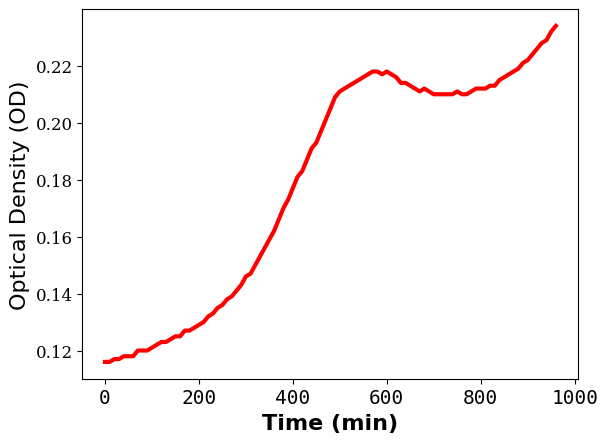

In [15]:
plt.plot(time_min, Novabiocin, linewidth=3, color='red')
plt.xlabel('Time (min)', fontsize=16, fontweight='bold')
plt.ylabel('Optical Density (OD)', fontsize=16, fontweight='light')
plt.xticks(fontsize=14, fontfamily='monospace')  # Size and font of the numbers on x-axis
plt.yticks(fontsize=12, fontfamily='serif')  # Size and font of the numbers on y-axis
plt.show()

### Figure size

You can control the size and shape of your figure by first using `plt.figure(figsize=(width, height))`, where width and height are in inches.

Here is an example of the growth curve in a wide, 3:1 aspect ratio.

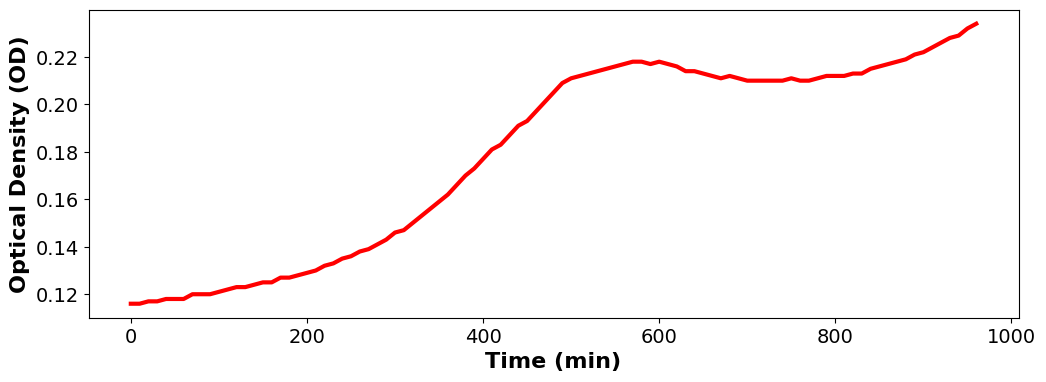

In [16]:
plt.figure(figsize=(12, 4))  # 3:1 aspect ratio (width:height)
plt.plot(time_min, Novabiocin, linewidth=3, color='red')
plt.xlabel('Time (min)', fontsize=16, fontweight='bold')
plt.ylabel('Optical Density (OD)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Log and Semi-Log plots

Sometimes data spans many orders of magnitude, or you want to reveal exponential behavior. In these cases, logarithmic scales are useful.

**Semi-log plot** (log y-axis, linear x-axis): Use this when you suspect exponential growth or decay. Exponential curves appear as straight lines, making it easy to identify growth phases.

**Log-log plot** (log x-axis, log y-axis): Use this when you suspect a power-law relationship between variables. Power laws appear as straight lines.

Matplotlib provides `plt.semilogy()`, `plt.semilogx()`, and `plt.loglog()` for these different scales.

### Axis limits

You can set limits using `plt.xlim` and `plt.ylim` for the pyplot style, or `ax.set_xlim` and `ax.set_ylim` for the axes object style.

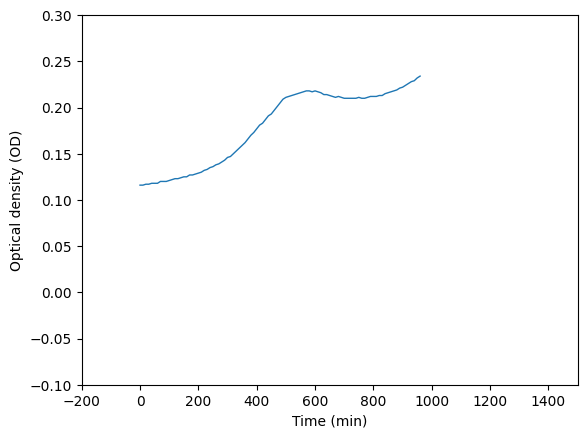

In [80]:
plt.plot(time_min, Novabiocin, linewidth=1)
plt.xlabel('Time (min)')
plt.ylabel('Optical density (OD)')

plt.xlim(-200, 1500)
plt.ylim(-0.1, 0.3)

plt.show()

### Exercise 1

Plot the `Gentamycin` dataset. Make two figures, one which would look good in a paper and on which would look good in a talk. Why did you choose the various parameters?


In [17]:
# Your code here



### Plotting multiple datasets on the same axes

We often want to plot multiple datasets on the same axis to compare the results. We will need to make sure they are visually distinct, e.g. with different coloes, and that there is a legend. Python will default to choosing different colors, but you could always specify them explicitely.

In a paper, you might not use a legend and instead define the colors in the figure caption.

Let's make a single figure that plots the growth curves from the different drugs on the same plot. We will add a `label` to each plot which tells Python what to put in the legend.

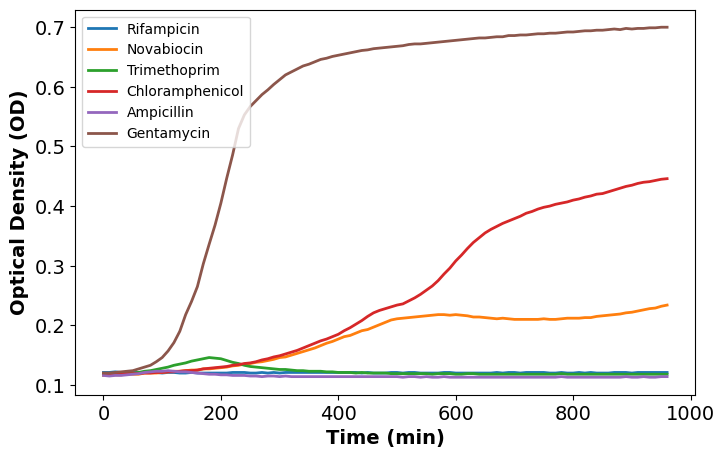

In [51]:
plt.figure(figsize=(8, 5))
plt.plot(time_min, Rifampicin, lw=2, label='Rifampicin')
plt.plot(time_min, Novabiocin, lw=2, label='Novabiocin')
plt.plot(time_min, Trimethoprim, lw=2, label='Trimethoprim')
plt.plot(time_min, Chloramphenicol, lw=2, label='Chloramphenicol')
plt.plot(time_min, Ampicillin, lw=2, label='Ampicillin')
plt.plot(time_min, Gentamycin, lw=2, label='Gentamycin')

plt.xlabel('Time (min)', fontsize=14, fontweight='bold')
plt.ylabel('Optical Density (OD)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=10, loc='upper left')
plt.show()

### Exercise 2

Make a plot of the two Chloramphenicol replicates. Do they look similar?

In [ ]:
# Your code here





## Scatter plots

A time series, like the OD growth curves, have a continous time variable so the lend themselves to the kinds of line plots we've been using. If you want to plot the relationship between one sampled variable and another, you might want to use a scatter plot.

Let's load a new data set which contains from [measurements from multiple woodlice](https://onlinelibrary.wiley.com/doi/full/10.1002/ece3.6683) of each animal's mass (in mg) and the average size of two different types of cells (in $\mu m^2$).

In [32]:
# Load woodlice data, skipping the first column (text labels)
# We will skip the first column for now, can you tell why?
woodlice_data = np.loadtxt('data/woodlice_cell_size.csv', delimiter=',', skiprows=1, usecols=(1, 2, 3))

mass = woodlice_data[:, 0]  # Mass in mg
bcell_area = woodlice_data[:, 1]  # First cell type area in μm²
gutcell_area = woodlice_data[:, 2]  # Second cell type area in μm²

Let's look at how the mass and b cell area relate to each other.

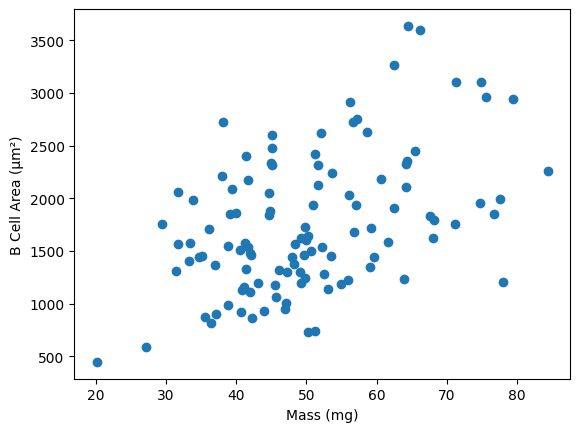

In [33]:
# Make a scatter plot of bcell_area vs mass
plt.scatter(mass, bcell_area)
plt.xlabel('Mass (mg)')
plt.ylabel('B Cell Area (μm²)')
plt.show()

We can set the marker type, size, and color like this. Note that you can use the transparency `alpha` parameter to allow you to see the overlap between points.

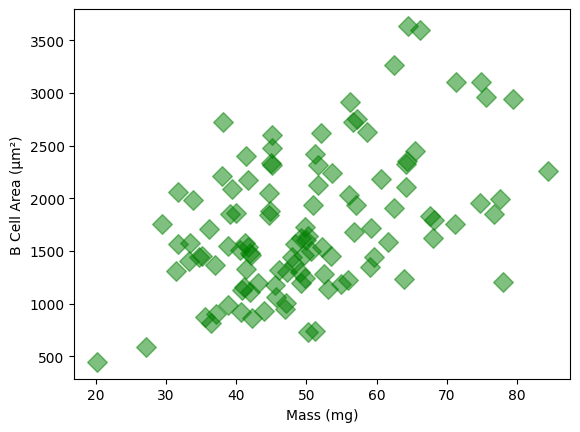

In [52]:
plt.scatter(mass, bcell_area, marker='D', s=100, color='green', alpha=0.5)
plt.xlabel('Mass (mg)')
plt.ylabel('B Cell Area (μm²)')
plt.show()

You can also plot multiple scatter plots on the same axes.

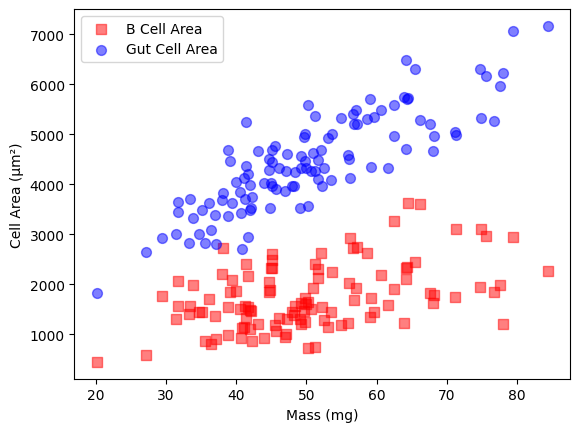

In [56]:
plt.scatter(mass, bcell_area, marker='s', s=50, color='red', alpha=0.5, label='B Cell Area')
plt.scatter(mass, gutcell_area, marker='o', s=50, color='blue', alpha=0.5, label='Gut Cell Area')
plt.xlabel('Mass (mg)')
plt.ylabel('Cell Area (μm²)')
plt.legend()
plt.show()

## Multiple axes

You can specify plots to belong to specific axes and change their properties individually. This can be useful if the data share the same x-axis (independent variable), but vary a lot in scale so plotting them on the same y-axis makes it hard to see the details. An example of this would be the Gentamycin and Ampicilin treated growth curves from before.

The axes object is usually called `ax`. You can think of it as the rectangular plotting area where data is drawn.

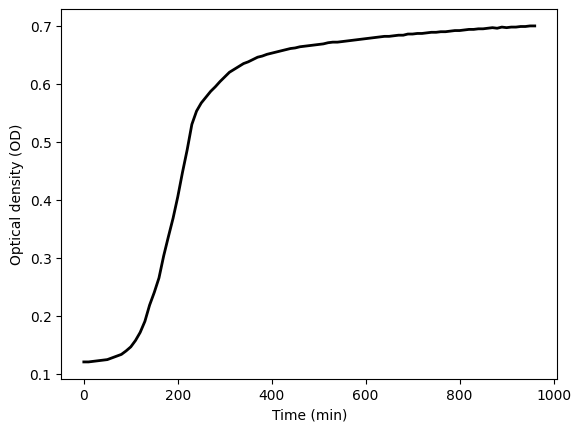

In [61]:
fig, ax = plt.subplots()
ax.plot(time_min, Gentamycin, lw=2, color="black", label='Gentamycin')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Optical density (OD)')
plt.show()

We can now create a second y axis using `twinx` and plot the Ampicilin data using it.

`ax.twinx()` creates a new axes that shares the same x axis but has its own y axis.

We will also color the axis labels and tick labels to match the corresponding line. This makes the plot easier to read.

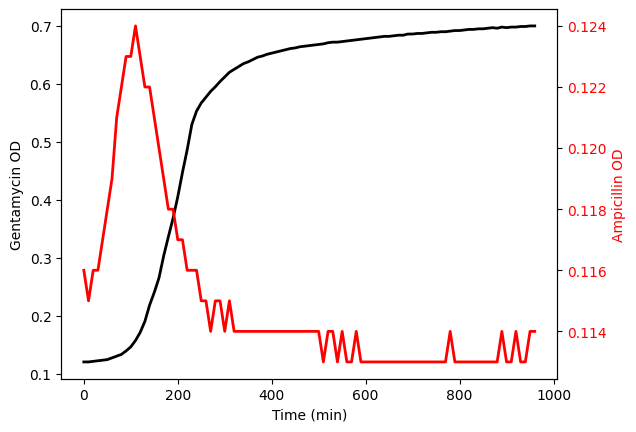

In [60]:
fig, ax1 = plt.subplots()

ax1.plot(time_min, Gentamycin, lw=2, color='black', label='Gentamycin')
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Gentamycin OD', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx() # This creates a second y-axis that shares the same x-axis
ax2.plot(time_min, Ampicillin, linewidth=2, color='red', label='Ampicillin')
ax2.set_ylabel('Ampicillin OD', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

### Exercise 3

Make a single scatter plot of the B Cell and Gut Cell areas vs mass for the Woodlice data, with B Cell area on the left axis and Gut Cell area on the right axis


In [ ]:
# Your code here




## Subplots and panels

Sometimes you want to show multiple plots side by side for comparison, rather than overlaying them. Matplotlib's `plt.subplots()` function creates a grid of panels.

The syntax is: `fig, axes = plt.subplots(nrows, ncols, figsize=(width, height))`

This returns:
- **fig**: The figure object (the overall container)
- **axes**: An array of axes objects, one for each panel

You can then plot on individual panels using `axes[row, col].plot(...)`.

> Tip: After creating all your plots, use `plt.tight_layout()` to automatically adjust spacing between panels so labels don't overlap.

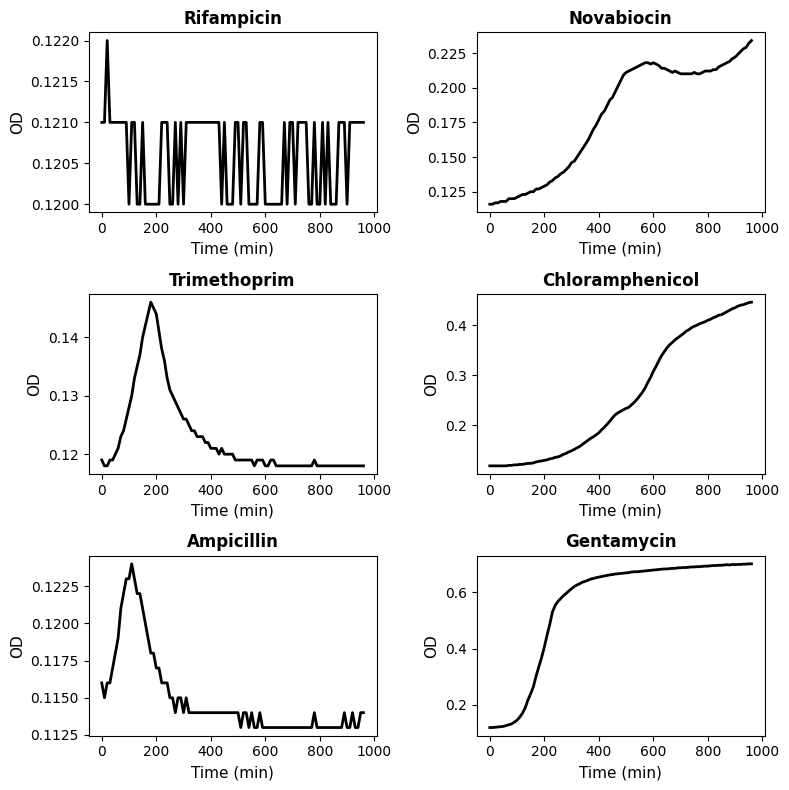

Figure saved as drug_growth_curves.png and drug_growth_curves.pdf


In [78]:
# Create a 3x2 grid of subplots for the six drug treatment growth curves inside a 8"x8" figure
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

# List of data and drug names
drugs = [Rifampicin, Novabiocin, Trimethoprim, Chloramphenicol, Ampicillin, Gentamycin]
drug_names = ['Rifampicin', 'Novabiocin', 'Trimethoprim', 'Chloramphenicol', 'Ampicillin', 'Gentamycin']

# Plot each drug in its own panel using nested for loops
drug_index = 0
for row in range(3):
    for col in range(2):
        axes[row, col].plot(time_min, drugs[drug_index], lw=2, color='black')
        axes[row, col].set_xlabel('Time (min)', fontsize=11)
        axes[row, col].set_ylabel('OD', fontsize=11)
        axes[row, col].set_title(drug_names[drug_index], fontsize=12, fontweight='bold')
        drug_index += 1
plt.tight_layout()

plt.savefig('drug_growth_curves.png', dpi=150)
plt.savefig('drug_growth_curves.pdf')

plt.show()

print('Figure saved as drug_growth_curves.png and drug_growth_curves.pdf')

Nice! Notice that I added commands at the end to save the plot both as a png graphic and pdf vector file. You should be able to see these in the file browser to the left.

## Histograms

A histogram is a graphical representation of the distribution of a continuous dataset, where data is grouped into bins (ranges) and the height of each bar shows how many values fall into that bin.

You will learn much more about the statistics of different distributions later in the course, but for now we will learn how to make a histogram from a set of data points.

Looking at the mass of the woodlice from our earlier plots, we see that the values are about 20-80 mg. There are a little over 100 points, so let's try using 10 bins.


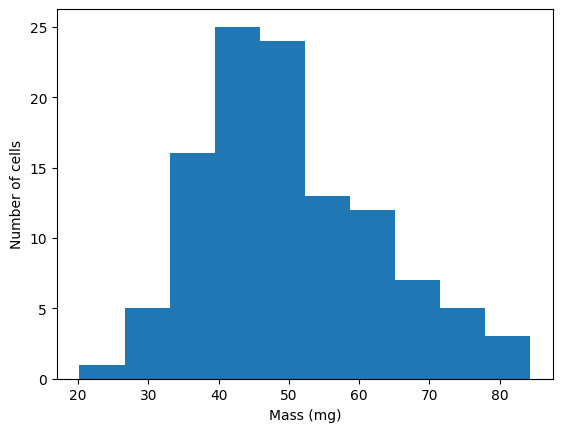

In [85]:
plt.hist(mass, bins=10)
plt.xlabel('Mass (mg)')
plt.ylabel('Number of cells')
plt.show()

### Exercise 4

Make a single figure with two subplots, one showing the histogram of areas for the B cells and the other showing the histogram of areas for the gut cells from the woodlice.


In [ ]:
# Your code here





## 10. Comparing distributions within the same plot

There are a variety of ways to compare distributions of data on the same plot, including bar plots, box and whisker plots, and violin plots.

Let's load some data from the Adamson lab that shows ...


In [ ]:
labels = ['Control', 'Treatment A', 'Treatment B']
means = np.array([12.3, 15.1, 9.8])
errors = np.array([1.2, 1.0, 1.5])

plt.figure(figsize=(6, 4))
plt.bar(labels, means, yerr=errors)
plt.ylabel('Lifespan (days)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## 7. Violin plots: comparing distributions across categories

A violin plot is useful when you want to compare several distributions side by side, for example three experimental conditions.

A violin plot shows a smoothed distribution shape. It is most informative when you have many points per category.

In this notebook we will keep the dataset generic. You can swap in a real dataset later without changing the plotting code structure.


### Placeholder data for multiple conditions

Use placeholder filenames for now. Each file should contain one column of values for one condition.


In [ ]:
data_A = np.loadtxt('data/condition_A.csv', delimiter=',')
data_B = np.loadtxt('data/condition_B.csv', delimiter=',')
data_C = np.loadtxt('data/condition_C.csv', delimiter=',')

len(data_A), len(data_B), len(data_C)


### Violin plot

Matplotlib does not automatically label categories on the x axis for violin plots, so we will set the tick labels ourselves.


In [ ]:
plt.violinplot([data_A, data_B, data_C], showmeans=True)
plt.xticks([1, 2, 3], ['A', 'B', 'C'])
plt.xlabel('Condition')
plt.ylabel('Measured quantity')
plt.tight_layout()
plt.show()
